In [15]:
import os
import glob

import numpy as np
import pandas as pd

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn import metrics

import matplotlib.pyplot as plt

# 1. Import features and labels CSVs

In [16]:
path = os.getcwd() + '/safety/features' # feature data
feature_files = glob.glob(path + "/*.csv")

li = []

for filename in feature_files:
    df = pd.read_csv(filename, index_col=None, header=0)
    li.append(df)
df_features = pd.concat(li, axis=0, ignore_index=True)

df_features.info()
df_features.head(10)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16135561 entries, 0 to 16135560
Data columns (total 11 columns):
bookingID         int64
Accuracy          float64
Bearing           float64
acceleration_x    float64
acceleration_y    float64
acceleration_z    float64
gyro_x            float64
gyro_y            float64
gyro_z            float64
second            float64
Speed             float64
dtypes: float64(10), int64(1)
memory usage: 1.3 GB


,bookingID,Accuracy,Bearing,acceleration_x,acceleration_y,acceleration_z,gyro_x,gyro_y,gyro_z,second,Speed
0,1194000908341,4.000,203.000000,1.001973,9.745000,-0.790087,-0.066046,0.019175,0.044741,246.0,6.480000
1,1099511627891,3.000,311.000000,0.452518,9.273026,3.098191,0.005382,0.002155,-0.001436,66.0,0.340365
2,962072674446,10.000,142.807999,0.018542,-8.041156,-4.960114,0.004223,-0.014875,0.007397,1552.0,2.050000
3,1142461300867,8.000,171.205292,-0.290698,-8.295367,-3.049042,0.033618,0.046224,0.030559,277.0,17.608448
4,412316860548,19.379,0.000000,0.675613,8.846130,1.852508,-0.008652,0.003693,0.001160,148.0,0.000000
5,1176821039217,4.864,277.000000,0.268151,9.011775,1.781286,0.000192,0.003718,-0.011833,56.0,1.053419
6,738734375093,16.000,290.901459,0.881815,-9.852637,1.785162,0.076716,0.012401,-0.022666,641.0,2.596329
7,755914244124,9.648,353.000000,-1.690124,9.524643,2.555557,-0.346084,-0.419119,0.118720,115.0,5.090000
8,8589934608,3.900,22.000000,-0.452377,9.679642,2.923172,-0.003677,0.009720,-0.026703,430.0,13.840000
9,584115552266,4.000,199.000000,-6.914666,2.839610,6.498062,0.011221,-0.035768,0.039490,1044.0,26.240519


In [17]:
df_labels = pd.read_csv(os.getcwd() + "/safety/labels/part-00000-e9445087-aa0a-433b-a7f6-7f4c19d78ad6-c000.csv")
df_labels.info()
pd.value_counts(df_labels['label'].values, sort=False)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20018 entries, 0 to 20017
Data columns (total 2 columns):
bookingID    20018 non-null int64
label        20018 non-null int64
dtypes: int64(2)
memory usage: 312.9 KB


0    15017
1     5001
dtype: int64

# 2. Calculate Pitch, Roll, Yaw & Gyro Magnitude features

In [18]:
df_features['Gyro_Magnitude'] = np.sqrt(np.power(df_features['gyro_x'], 2) + np.power(df_features['gyro_y'], 2) + np.power(df_features['gyro_z'], 2))

df_features["Pitch"] = (np.arctan2(df_features["acceleration_x"], np.sqrt(np.power(df_features['acceleration_y'], 2) + np.power(df_features['acceleration_z'], 2)))*180)/np.pi
df_features["Roll"] = (np.arctan2(df_features["acceleration_y"], np.sqrt(np.power(df_features['acceleration_x'], 2) + np.power(df_features['acceleration_z'], 2)))*180)/np.pi
df_features["Yaw"] = (np.arctan2(df_features["acceleration_z"], np.sqrt(np.power(df_features['acceleration_x'], 2) + np.power(df_features['acceleration_y'], 2)))*180)/np.pi

# Drop acceleration xyz and gyro xyz from freature dataframe
df_features.drop(['acceleration_x', 'acceleration_y', 'acceleration_z', 'gyro_x', 'gyro_y', 'gyro_z'], axis=1, inplace=True)


In [19]:
df_features.head(10)

,bookingID,Accuracy,Bearing,second,Speed,Gyro_Magnitude,Pitch,Roll,Yaw
0,1194000908341,4.000,203.000000,246.0,6.480000,0.082046,5.851413,82.540165,-4.610976
1,1099511627891,3.000,311.000000,66.0,0.340365,0.005972,2.650009,71.342596,18.454412
2,962072674446,10.000,142.807999,1552.0,2.050000,0.017141,0.112449,-58.331840,-31.667913
3,1142461300867,8.000,171.205292,277.0,17.608448,0.064813,-1.883891,-69.734526,-20.170005
4,412316860548,19.379,0.000000,148.0,0.000000,0.009478,4.275044,77.433821,11.794268
5,1176821039217,4.864,277.000000,56.0,1.053419,0.012405,1.672035,78.696172,11.176251
6,738734375093,16.000,290.901459,641.0,2.596329,0.080950,5.032854,-78.575189,10.229773
7,755914244124,9.648,353.000000,115.0,5.090000,0.556353,-9.725192,72.168065,14.798480
8,8589934608,3.900,22.000000,430.0,13.840000,0.028654,-2.561667,73.007550,16.786593
9,584115552266,4.000,199.000000,1044.0,26.240519,0.054449,-44.276989,16.660285,41.000534


# 3. Append labels into feature dataset

In [20]:
df_data = pd.merge(df_features, df_labels, how='left', on = 'bookingID')
pd.value_counts(df_data['label'].values, sort=False)

0    11215547
1     4938871
dtype: int64

# 4. Train a RandomForestClassifier

In [21]:
y = df_data["label"]

df_data.drop(["label"], axis=1, inplace=True)

X_train, X_test, y_train, y_test = train_test_split(df_data, y, test_size = 0.3, random_state=42)
model = RandomForestClassifier(n_estimators=25, criterion='entropy',n_jobs = 5, verbose=3)
model.fit(X_train, y_train)

[Parallel(n_jobs=5)]: Using backend ThreadingBackend with 5 concurrent workers.


building tree 1 of 25
building tree 2 of 25building tree 3 of 25

building tree 5 of 25building tree 4 of 25

building tree 6 of 25
building tree 7 of 25
building tree 8 of 25
building tree 9 of 25
building tree 10 of 25
building tree 11 of 25
building tree 12 of 25
building tree 13 of 25
building tree 14 of 25
building tree 15 of 25
building tree 16 of 25
building tree 17 of 25
building tree 18 of 25
building tree 19 of 25
building tree 20 of 25
building tree 21 of 25
building tree 22 of 25
building tree 23 of 25
building tree 24 of 25
building tree 25 of 25


[Parallel(n_jobs=5)]: Done  25 out of  25 | elapsed: 16.8min remaining:    0.0s
[Parallel(n_jobs=5)]: Done  25 out of  25 | elapsed: 16.8min finished


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='entropy',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=25, n_jobs=5,
            oob_score=False, random_state=None, verbose=3,
            warm_start=False)

# 5. Prediction

In [22]:
y_test_pred = model.predict(X_test)

[Parallel(n_jobs=5)]: Using backend ThreadingBackend with 5 concurrent workers.
[Parallel(n_jobs=5)]: Done  25 out of  25 | elapsed:   24.8s remaining:    0.0s
[Parallel(n_jobs=5)]: Done  25 out of  25 | elapsed:   24.8s finished


In [23]:
print("Accuracy", metrics.accuracy_score(y_test, y_test_pred))

('Accuracy', 0.9284631285637821)


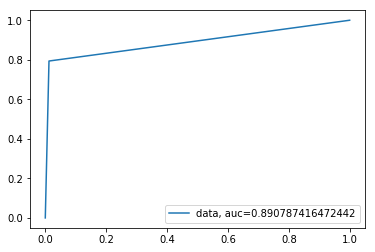

In [25]:
fpr, tpr, _ = metrics.roc_curve(y_test,  y_test_pred)
auc = metrics.roc_auc_score(y_test, y_test_pred)
plt.plot(fpr,tpr,label="data, auc="+str(auc))
plt.legend(loc=4)
plt.show()